In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a2215a6103eb084a89357ccde40a20d


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#for i, item in enumerate(list):
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | ngunguru
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | aldan
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | oktyabrskiy
Processing Record 10 of Set 1 | sipe sipe
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | lourdes
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | blacksburg
Processing Record 19 of Set 1 | gizo
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | tandil
Processing Record 22 o

Processing Record 41 of Set 4 | moanda
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | kangaatsiaq
Processing Record 46 of Set 4 | bihoro
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | hasaki
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | port-gentil
Processing Record 4 of Set 5 | burica
City not found. Skipping...
Processing Record 5 of Set 5 | heinola
Processing Record 6 of Set 5 | bud
Processing Record 7 of Set 5 | road town
Processing Record 8 of Set 5 | alibag
Processing Record 9 of Set 5 | acopiara
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | poletayevo
Processing Record 12 of Set 5 | udachnyy
Processing Record 13 of Set 5 | attawapiskat
City not found. Skippi

Processing Record 31 of Set 8 | pryazha
Processing Record 32 of Set 8 | waipawa
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | avarua
Processing Record 35 of Set 8 | lagunas
Processing Record 36 of Set 8 | beloha
Processing Record 37 of Set 8 | ahuimanu
Processing Record 38 of Set 8 | ende
Processing Record 39 of Set 8 | haibowan
City not found. Skipping...
Processing Record 40 of Set 8 | sassandra
Processing Record 41 of Set 8 | isangel
Processing Record 42 of Set 8 | jackson
Processing Record 43 of Set 8 | makakilo city
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | juifang
City not found. Skipping...
Processing Record 46 of Set 8 | paso de los toros
Processing Record 47 of Set 8 | san felipe
Processing Record 48 of Set 8 | viana
Processing Record 49 of Set 8 | kalakamati
Processing Record 50 of Set 8 | kjopsvik
Processing Record 1 of Set 9 | baoro
Processing Record 2 of Set 9 | axim
Processing Record 3 of Set 9 | puksoozero
Pro

Processing Record 19 of Set 12 | srivardhan
Processing Record 20 of Set 12 | mgachi
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | bethel
Processing Record 23 of Set 12 | chernyshevskiy
Processing Record 24 of Set 12 | salinopolis
Processing Record 25 of Set 12 | bhawanipatna
Processing Record 26 of Set 12 | lushunkou
City not found. Skipping...
Processing Record 27 of Set 12 | shabqadar
Processing Record 28 of Set 12 | warqla
City not found. Skipping...
Processing Record 29 of Set 12 | ndiekro
City not found. Skipping...
Processing Record 30 of Set 12 | noumea
Processing Record 31 of Set 12 | teahupoo
Processing Record 32 of Set 12 | tuy hoa
Processing Record 33 of Set 12 | fort nelson
Processing Record 34 of Set 12 | lexington-fayette
Processing Record 35 of Set 12 | vestmanna
Processing Record 36 of Set 12 | goderich
Processing Record 37 of Set 12 | wadi musa
Processing Record 38 of Set 12 | haines junction
Processing Record 39 of Set 12 | sorong
Processing 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,79.90,78,98,18.86,PF,2020-07-10 22:02:00
1,Ilulissat,69.22,-51.10,42.80,87,100,12.75,GL,2020-07-10 22:02:00
2,Ngunguru,-35.62,174.50,50.00,3,3,1.99,NZ,2020-07-10 22:02:01
3,Mahebourg,-20.41,57.70,69.80,64,75,18.34,MU,2020-07-10 22:02:01
4,Aldan,58.60,125.39,71.35,75,0,5.86,RU,2020-07-10 22:02:01
5,San Patricio,19.22,-104.70,89.60,66,40,17.22,MX,2020-07-10 22:02:01
6,Ushuaia,-54.80,-68.30,35.60,69,40,5.82,AR,2020-07-10 21:58:18
7,Oktyabrskiy,54.48,53.47,66.79,95,93,5.21,RU,2020-07-10 22:02:01
8,Sipe Sipe,-17.45,-66.38,75.20,13,0,8.05,BO,2020-07-10 22:02:01
9,Cidreira,-30.18,-50.21,57.83,82,0,13.56,BR,2020-07-10 22:01:45


In [14]:
# Assign a variable to change the order of columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new = city_data_df[new_column_order]
city_data_new

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2020-07-10 22:02:00,-9.80,-139.03,79.90,78,98,18.86
1,Ilulissat,GL,2020-07-10 22:02:00,69.22,-51.10,42.80,87,100,12.75
2,Ngunguru,NZ,2020-07-10 22:02:01,-35.62,174.50,50.00,3,3,1.99
3,Mahebourg,MU,2020-07-10 22:02:01,-20.41,57.70,69.80,64,75,18.34
4,Aldan,RU,2020-07-10 22:02:01,58.60,125.39,71.35,75,0,5.86
...,...,...,...,...,...,...,...,...,...
573,Balingasay,PH,2020-07-10 22:03:25,16.36,119.86,83.52,73,100,4.45
574,San Policarpo,PH,2020-07-10 22:03:25,12.18,125.51,81.95,79,100,5.41
575,Fairbanks,US,2020-07-10 22:02:06,64.84,-147.72,66.99,34,1,7.85
576,Svetlaya,RU,2020-07-10 22:03:25,46.54,138.33,60.28,80,38,8.90


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

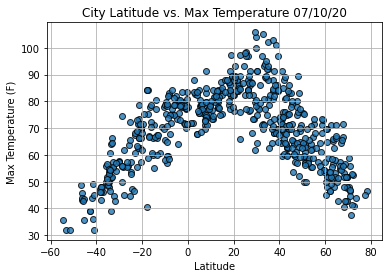

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

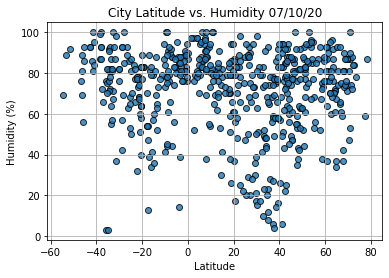

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

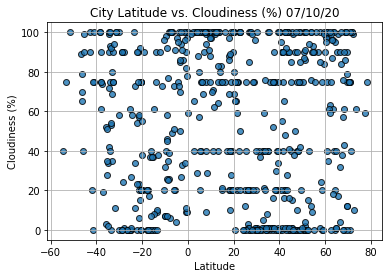

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

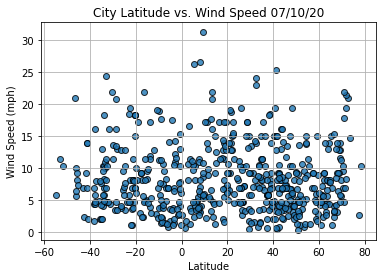

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ilulissat,69.22,-51.10,42.80,87,100,12.75,GL,2020-07-10 22:02:00
4,Aldan,58.60,125.39,71.35,75,0,5.86,RU,2020-07-10 22:02:01
5,San Patricio,19.22,-104.70,89.60,66,40,17.22,MX,2020-07-10 22:02:01
7,Oktyabrskiy,54.48,53.47,66.79,95,93,5.21,RU,2020-07-10 22:02:01
10,Lata,40.16,-8.33,73.99,57,0,1.99,PT,2020-07-10 22:02:02
...,...,...,...,...,...,...,...,...,...
573,Balingasay,16.36,119.86,83.52,73,100,4.45,PH,2020-07-10 22:03:25
574,San Policarpo,12.18,125.51,81.95,79,100,5.41,PH,2020-07-10 22:03:25
575,Fairbanks,64.84,-147.72,66.99,34,1,7.85,US,2020-07-10 22:02:06
576,Svetlaya,46.54,138.33,60.28,80,38,8.90,RU,2020-07-10 22:03:25


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

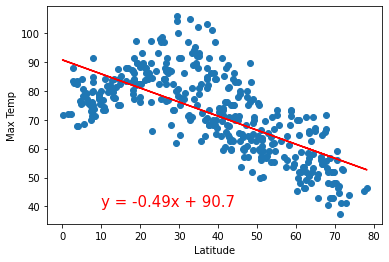

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [58]:
# Perform linear regression for Southern Hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.49x + 90.7


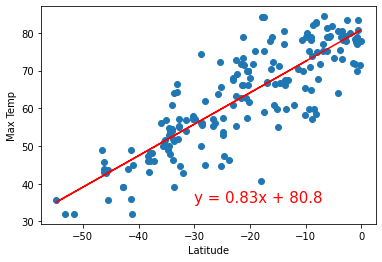

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       {'Linear Regression on the Southern Hemisphere',
                       'for Maximum Temperature'}, 'Max Temp',(-30,35))

In [53]:
# Perform linear regression for Southern Hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.83x + 80.8


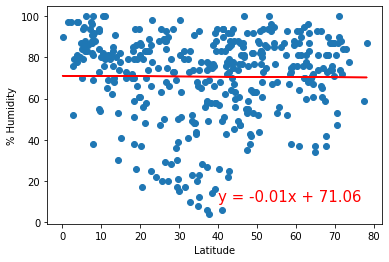

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [70]:
# Perform linear regression for Southern Hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.01x + 71.06


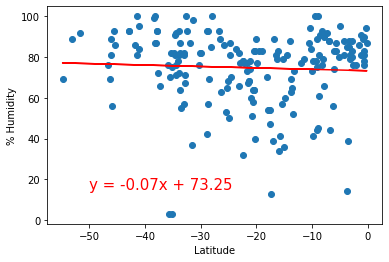

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [68]:
# Perform linear regression for Southern Hemisphere.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.07x + 73.25


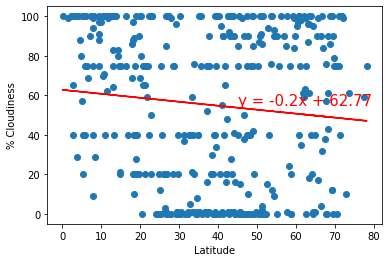

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,55))

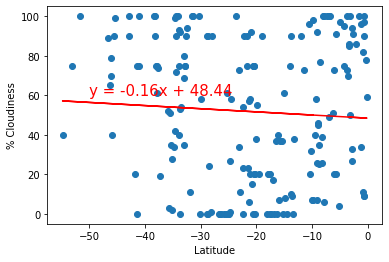

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

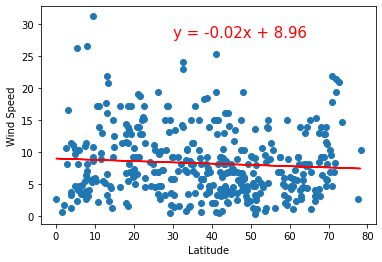

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,28))

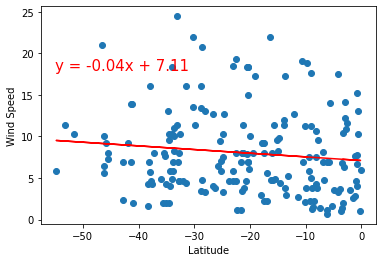

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,18))